In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.integrate as integrate

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

/home/matteo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log
/home/matteo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/matteo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


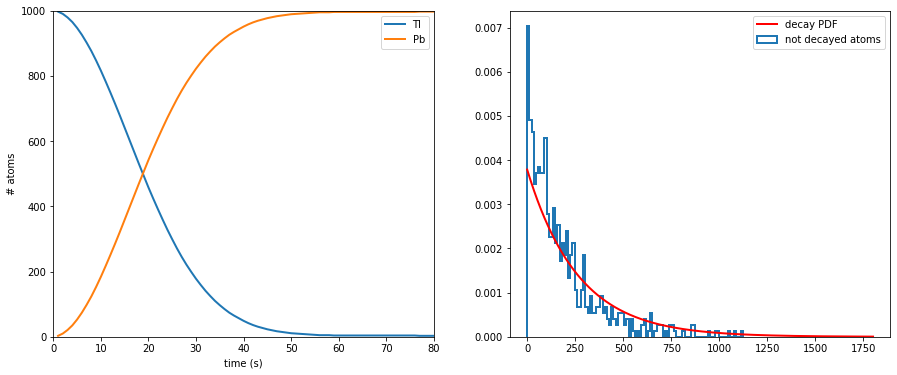

In [12]:
Tl = 1000
Pb = 0
tau = 3.052*60 #s
t = 0 #s

thallium = []
lead = []
time = []

def decay_prob(t):
    return 1 - pow(2,-t/tau)

while (Tl>0):
    t += 1
    dec = int(Tl*decay_prob(t))
    Tl -= dec
    Pb += dec
    thallium.append(Tl)
    lead.append(Pb)
    time.append(t)

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(time, thallium, label='Tl', linewidth=2)
plt.plot(time, lead, label='Pb', linewidth=2)
plt.axis([0, 80, 0, 1000])
plt.xlabel('time (s)')
plt.ylabel('# atoms')
plt.legend()

#inverse transform method
def decay_pdf(t, tau=3.052*60):
    return pow(2,-t/tau) * np.log(2) / tau
def decay_cdf(t, tau=3.052*60):
    return 1 - decay_PDF(t)
def decay_icdf(z, tau=3.052*60):
    return -tau * np.log(1-z/np.log(2))

u = np.random.random(1000)
v = decay_icdf(u)

plt.subplot(122)
plt.hist(v, histtype='step', bins=100, density=True, linewidth=2, label='not decayed atoms')
x = np.linspace(0,1800,1000)
plt.plot(x, decay_pdf(x), linewidth=2, c='r', label='decay PDF')
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back", i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

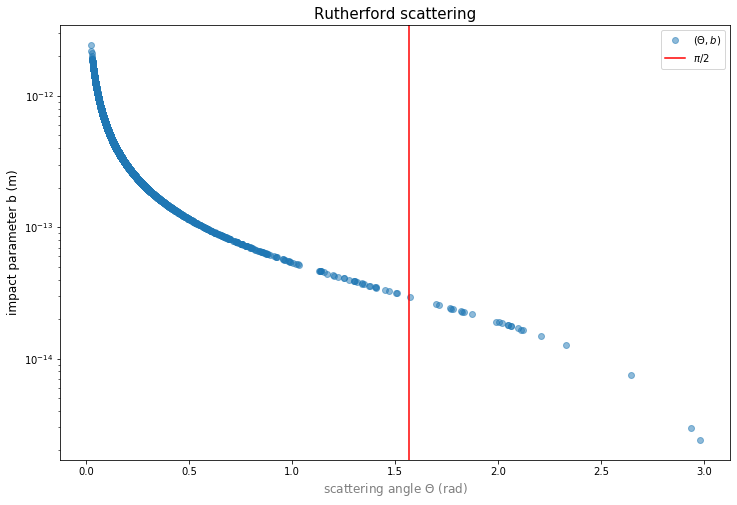

fraction of the particles that bounce back is 0.0025
plot (y logscale) shows the condition of a little parameter impact b for the particle to bounce back


In [6]:
import scipy.constants as sc

n = 10000
a0 = sc.physical_constants['Bohr radius'][0]
b1 = np.random.normal(loc=0.0, scale=a0/100, size=n)
b2 = np.random.normal(loc=0.0, scale=a0/100, size=n)
beam = (b1, b2)

def scatter_angle(b, i, Z=79, E=7.7*1e06*sc.e):
    return 2*np.arctan((Z*sc.e**2) / (2*sc.pi*sc.epsilon_0*E*np.sqrt(b[0][i]**2+b[1][i]**2)))

theta = []
pos = 0
neg = 0
for i in range(n):
    theta.append(scatter_angle(beam,i))
    if (theta[i]>np.pi/2):
        pos += 1
    elif (theta[i]<np.pi/2):
        neg += 1

plt.figure(figsize=(12,8))
plt.plot(theta, np.sqrt(b1**2+b2**2), 'o', alpha=0.5, label='($\Theta, b$)')
plt.axvline(x=np.pi/2, c='r', label='$\pi/2$')
plt.title('Rutherford scattering', fontsize=15)
plt.xlabel('scattering angle $\Theta$ (rad)', fontsize=12, alpha=0.5)
plt.ylabel('impact parameter b (m)', fontsize=12)
plt.yscale('log')
plt.legend()
plt.show()

print('fraction of the particles that bounce back is', pos/(pos+neg))
print('plot (y logscale) shows the condition of a little parameter impact b for the particle to bounce back')

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [15]:
f = lambda x: (np.sin(1/(x*(2-x))))**2

ax = np.linspace(0.001,1.999,1000)

#hit/miss method with error
N = 10000
count = 0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N

diff = 0
for xi in ax:
    diff += np.abs(xi-1)
var = diff * len(ax)/(len(ax)-1)
std = 2 * np.sqrt(var) / np.sqrt(len(ax))
print('hit/miss method:', "%.4f"%I, '\pm', "%.4f"%std)

#mean value method with error
sum = 0
for xi in ax:
    sum += f(xi)
I = sum * (2-0)/len(ax)

diff = 0
for xi in ax:
    diff += (xi-1)**2
var = diff * len(ax)/(len(ax)-1)
std = 2 * np.sqrt(var) / np.sqrt(len(ax))
print('mean value method:', "%.4f"%I, '\pm', "%.4f"%std)

hit/miss method: 1.4512 \pm 1.4149
mean value method: 1.4545 \pm 1.1553


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [20]:
#hit/miss method 2D circle
N = 10000
inside = 0

for i in range(N):
    x=np.random.random()
    y=np.random.random()
    if (x**2+y**2<1):
        inside += 1

I = inside*4/N
print('2D circle of unit radius:')
print('hit/miss method:', "%.4f"%I)

#scipy.integrate 2D circle
def f(x,y):
    if (x**2+y**2<1):
        return 1
    else:
        return 0
    
I = integrate.dblquad(f, -1, 1, lambda x: -1, lambda x: 1)
print('scipy.integrate.dblquad:', "%.4f"%I[0], '\n')

#scipy.integrate 10D sphere
def g(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10):
    if (x1**2+x2**2+x3**2+x4**2+x5**2+x6**2+x7**2+x8**2+x9**2+x10**2<1):
        return 1
    else:
        return 0
    
#I = integrate.nquad(g, [[-1,1], [-1,1], [-1,1], [-1,1], [-1,1], [-1,1], [-1,1], [-1,1], [-1,1], [-1,1]])
#print('10D sphere:')
#print('scipy.integrate.nquad:', "%.4f"%I[0])

2D circle of unit radius:
hit/miss method: 3.0968
scipy.integrate.dblquad: 3.1421 



5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [30]:
f = lambda x: pow(x,-1/2) / (np.exp(x)+1)
w = lambda x: pow(x,-1/2)

x = np.linspace(1e-25,1,10000)
i1 = np.sum(f(x)/w(x)) / len(x)
#i1 = (f(x)/w(x)).mean() / len(x)
i2 = 2 #integration of w(x) from 0 to 1
I = i1 * i2
print('importance sampling method:', I)

sol = integrate.quad(f, 0, 1)
print('scipy.integrate:', sol[0])

importance sampling method: 0.7597719032159626
scipy.integrate: 0.8389329600133838
